# Non linear models

In [1]:
from sklearn import datasets
import numpy as np
from matplotlib import pyplot as plt

This creates the data we will play with:

In [2]:
noisy_circles = datasets.make_circles(n_samples=100, factor=.5,
                                      noise=.05, random_state=1)
X = np.array(noisy_circles[0])
y = noisy_circles[1]

Let's plot it:

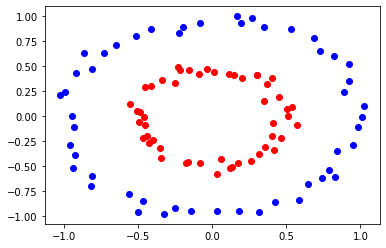

In [3]:
plt.scatter(X[:,0][y==1],X[:,1][y==1], color='r')
plt.scatter(X[:,0][y==0],X[:,-1][y==0], color='b')


Implement the function `augment` that takes as argument `X` a `nd`x`nf` dataset of `nd` data points with `nf` features. It should return an augmented dataset the contains a constant term, the original features and all second order combinations of features.
The augmented matrix should look like this

$$ 
\left(
\begin{matrix}
X_{11} & X_{12}  & \cdots & X_{1n_f}\\
X_{21} & \\
\vdots \\
X_{n_d 1} & & & X_{n_d n_f}
\end{matrix}
\right)
\rightarrow
\left(
\begin{array}{c|cccc| cccc|ccc}
%\begin{matrix}
1& X_{11} & X_{12}  & \cdots & X_{1n_f} & X_{11}^2 & X_{12}^2 & \cdots & X_{1n_f}^2  
& X_{11}\cdot X_{12} & \cdots & X_{1 (n_f-1)}\cdot X_{1 n_f} \\
1& X_{21} & \\
\vdots \\
1& X_{n_d 1} & & & X_{n_d n_f}
& & & & & & 
& X_{n_d (n_f-1)}\cdot X_{n_d n_f} \\
%\end{matrix}
\end{array}
\right)
$$

I.e. your new matrix should contain a vector of ones, then the orginal matrix, then the squared terms of the features, then products of the features. 

In [4]:
def augment(X):
    nd, nf = X.shape

    nnf = 1+ nf+ nf + (nf*(nf-1))//2
    print(nnf,3*nf)
    Xaug = np.empty( (nd, nnf ))
    # fill first row with ones
    index = 0
    Xaug[:,index] = np.ones(nd) 
    index = index +1
    # fill next nf elements (i.e the rows 1 to nf+1) with the old matrix
    Xaug[:,index:nf+index] = X
    index = index + nf
    # fill next nf elements (i.e the rows nf+2 to 2nf+2) with the squares of the features of the old matrix
    for ii in range(0,nf):
        Xaug[:,index] = X[:,ii]*X[:,ii]
        index = index + 1
    # fill next nf*(nf-1)/2 elements with products of different features of the old matrix
    for ii in range(0,nf-1):
        for jj in range(ii+1,nf):
            Xaug[:,index] = X[:,ii]*X[:,jj]
            index = index + 1 
    
    return Xaug

In [5]:
Xaug = augment(X)
assert Xaug.shape == (100, 6)
assert set(Xaug[0,:]) == set([-0.39910416635565776,
 -0.24312948020420502,
 0.05911194414436692,
 0.09703398851338364,
 0.15928413560244456,
 1.0])

6 6


Use a logistic regresssion model to fit to the augmented data. Create a plot to show that with the additional features we can separate the data. To make a contour plot, you can create a grid in the input feature space and calculate the prediction of each of the grid points which you can plot using the `contourf` function.

To plot the selection boundary of the model, you can follow these steps:

(i) Create a grid of the (two) input features in X, $x_1$ and $x_2$.  To do so, you can for instance combine two arrays using the `np.meshgrid` function.

(ii) Use the `ravel` function to turn the arrays of the grid coordinates into two one-dimensional, i.e. a one-dimensional array for the $x_1$ coordinates and a one-dimensional array for the $x_2$ coordinate. Then, combine the `x1` and `x2` arrays to a matrix of $[x_1, x_2]$ pairs. 

(iii) Calculate the prediction $Z$ for the (augmented) grid matrix using the `predict` function of Logistic Regression. The function will return a one-dimensional array of the prediction for the data points. You can regroup this array into a two-dimensional one using the `reshape` function.

(iv) Make a contour plot of the grid data using the `contourf` function.

You might also find it useful, to look at the following example of a similar problem which goes through the steps of creating a grid:

https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html

6 6
6 6


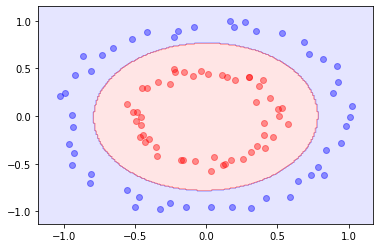

In [6]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs')

# plot the data (copied from above)
plt.scatter(X[:,0][y==1],X[:,1][y==1], color='r',alpha=0.4)
plt.scatter(X[:,0][y==0],X[:,-1][y==0], color='b',alpha=0.4)

# you can use this color map for your contour plot to use the same colors as for the data points
# you need to put it in as an argument like this:
# plt.contourf(... , alpha=0.1, cmap=cmap)
from matplotlib.colors import ListedColormap
colors = ['b','r']
cmap = ListedColormap(colors)


Xaug = augment(X)
lr.fit(Xaug,y)

# plot the decision boundary

# create the grid
x1_min, x1_max = X[:, 0].min() - 0.15, X[:, 0].max() + 0.15
x2_min, x2_max = X[:, 1].min() - 0.15, X[:, 1].max() + 0.15
x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                     np.arange(x2_min, x2_max, 0.01))

# Use ravel to turn the two-dimensional arrays into long one-dimensional ones
xx1 = x1.ravel()
xx2 = x2.ravel()
# create a matrix of x1-x2 pairs
Xtest = np.array([xx1, xx2]).T

# Use the predict function on the augmented Xtest to get the prediction for the grid points
Z = lr.predict(augment(Xtest))
# reshape the prediction output; make 2-D arrays 
Z = Z.reshape(x1.shape)

# plot the contour plot
plt.contourf(x1, x2, Z, alpha=0.1, cmap=cmap)



# Regularisation
Use the training and validation set below to find the best values of $\alpha$ to use in the ridge regression loss for a eighth-order polynomial model. Train your model on the training sample and use the score (or loss) of the test sample as a measure for the quality of the fit. 

You may find it useful to include the modules commented out below (Ridge, PolynomialFeatures, LinearRegression). To find out more about these modules and their functionality, please check out the sklearn website. 

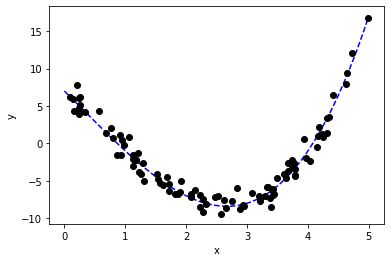

Best result for alpha is 0.040949150623804234  with R^2  0.9396977675972795


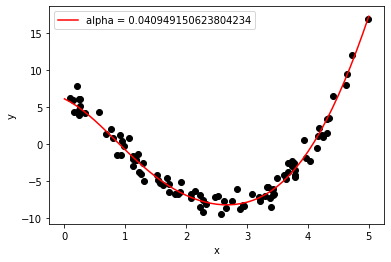

The best value of alpha is  0.040949150623804234


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def fn(x):
    return 7-8*x-0.5*x**2+0.5*x**3
  
n_train = 100
np.random.seed(1122)
xs = np.linspace(0,5)
rxs = 5* np.random.random(n_train)
X1D = np.array([rxs]).T
noise = np.random.normal(size = (n_train) )
ys1D = fn(rxs)+noise

# split into training and test sample
X_train, X_test, y_train, y_test = train_test_split(X1D, ys1D, test_size=0.4, random_state=0)

# this plots the full data sample and the function fn
plt.plot(xs, fn(xs),'b--')
plt.plot(rxs, ys1D,'ok')
plt.xlabel('x')
plt.ylabel('y');
plt.show()

# polynomial features 
polynomial_features= PolynomialFeatures(degree=8)
X_train = polynomial_features.fit_transform(X_train)

# prediction for fine x value grid
xval = np.arange(0,5.1,0.1)
xval_res = polynomial_features.fit_transform(xval.reshape(-1,1))
Xtest_res = polynomial_features.fit_transform(X_test)

y_ridge_alpha = []
#alphas=np.arange(0.,100.,0.01) # fine scan
alphas=np.logspace(-4,4) # broad scan
scores = []
for al in alphas:
    rr = Ridge(alpha=al)
    rr.fit(X_train,y_train)
    y_ridge_alpha.append(rr.predict(xval_res))
    score = rr.score(Xtest_res, y_test)
    #print(score)
    scores.append([al,score])

scores = np.array(scores)

#plt.plot(scores[:,0],scores[:,1])
#plt.xscale('log')
#plt.show()
max_pos = np.argmax(scores[:,1])
print('Best result for alpha is', scores[max_pos,0], ' with R^2 ', scores[max_pos,1])

# plotting
plt.plot(rxs, ys1D,'ok')  

mylabel = 'alpha = '+ str(scores[max_pos,0])
plt.plot(xval, y_ridge_alpha[max_pos], color='r', label=mylabel)

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

def bestAlpha():
    best_alpha = 0 # enter your best value for alpha to one signifcant digit here
    best_alpha = scores[max_pos,0]
    return best_alpha

print('The best value of alpha is ', bestAlpha())

In [9]:
# This cell is used for automatic grading. Please do not delete it. 
assert bestAlpha() > 0.03
assert bestAlpha() < 0.05


Make a plot of the score as a funtion of $\alpha$. Use a logarithmic scale for the x-axis and display the range $\alpha = [10^{-4}, \, 10^{4}]$.

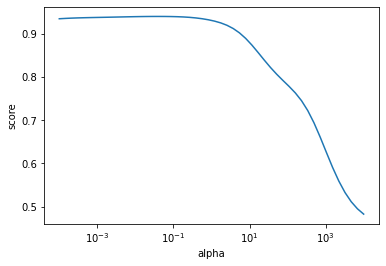

In [10]:
# plot alpha vs the score here
plt.plot(scores[:,0],scores[:,1],label='score')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('score')
plt.show()
